In [1]:
import logging as log
import os
import os.path as path
import pickle
import subprocess
import sys
import time
from multiprocessing import Pool
from pathlib import Path
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

In [2]:
df = pd.read_pickle(path.join('..', 'data', 'feat_matrix.pkl'))
with open(path.join('..', 'data', 'features_x.txt'), 'rb') as f:
    features = pickle.load(f)

In [3]:
df[df['Outlier'] == True].groupby(['Store'])['Sales'].count().sort_values(ascending=False).head(15)

Store
103     305
708     248
349     236
972     234
674     190
560     189
837     185
1081    185
25      184
105     182
969     181
339     180
589     179
663     179
700     179
Name: Sales, dtype: int64

In [4]:
df['Date'] = pd.to_datetime(df['DateInt'].apply(str))
df = df.set_index('Date')

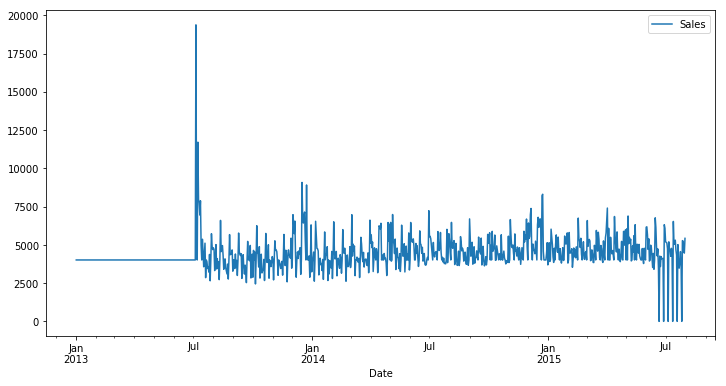

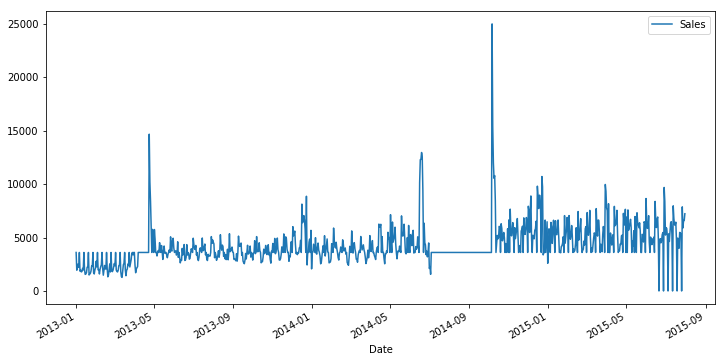

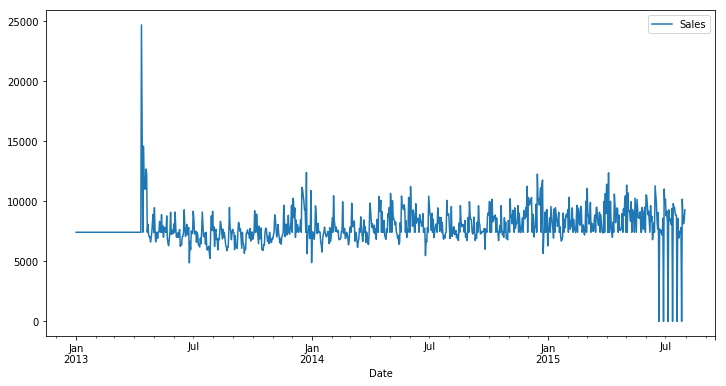

In [12]:
df_store = df[df['Store'] == 103]
df_store[['Sales']].plot(figsize=(12,6))
df_store = df[df['Store'] == 708]
df_store[['Sales']].plot(figsize=(12,6))
df_store = df[df['Store'] == 349]
df_store[['Sales']].plot(figsize=(12,6))
plt.show()

In [6]:
df_store[df_store['Sales'] == 0]

,Year,AvgYearSales,AvgStateHoliday,StateHoliday,DateInt,Week,SalesLog,HolidayNextWeek,LastDayCustomers,Avg3MonthsSales,...,Type,Avg3MonthsCustomers,SchoolHoliday,AvgPromo,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2Weeks,Outlier
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-26,2015,4579.0,0.0,0,20150726,30,0.0,5.0,0.0,4665.0,...,validation,420.0,0,4837.0,3,2,8,92,-1,NaN
2015-07-19,2015,4579.0,0.0,0,20150719,29,0.0,2.0,0.0,4665.0,...,validation,420.0,0,4837.0,3,2,8,92,-1,NaN
2015-07-12,2015,4579.0,0.0,0,20150712,28,0.0,0.0,0.0,4665.0,...,validation,420.0,0,4837.0,3,2,8,92,-1,NaN
2015-07-05,2015,4579.0,0.0,0,20150705,27,0.0,0.0,0.0,4665.0,...,validation,420.0,0,4837.0,3,2,8,92,-1,NaN
2015-06-28,2015,4579.0,0.0,0,20150628,26,0.0,0.0,0.0,4665.0,...,validation,420.0,0,4837.0,3,2,8,92,-1,NaN
2015-06-21,2015,4579.0,0.0,0,20150621,25,0.0,0.0,0.0,4665.0,...,validation,420.0,0,4837.0,3,2,8,92,-1,NaN


In [7]:
data = pd.read_csv('../data/train.csv', low_memory=False)
data[data['Sales'] == 0].shape

(172871, 9)

In [8]:
outliers_count = df[df['Outlier'] == True].shape[0]
val_sales_zero_count = df[(df['Type'] == 'validation') & (df['Sales'] == 0)].shape[0]

In [9]:
outliers_count + val_sales_zero_count

172817

In [10]:
data[(data['Open'] == 1) & (data['Sales'] == 0)].shape[0]

54